<a href="https://colab.research.google.com/github/Lohithl27/localrepo/blob/main/Deep_Learning__day4_ml_R_%26_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

## Importing lib

In [ ]:
# load_digits: Gives us a bunch of small handwritten number images.
from sklearn.datasets import load_digits

# KMeans: A grouping tool that puts similar things together.
from sklearn.cluster import KMeans

# PCA: A tool to simplify complex data so we can draw it on paper.
from sklearn.decomposition import PCA

# matplotlib.pyplot: A tool to draw graphs or pictures.
import matplotlib.pyplot as plt

## Load a sample dataset of handwritten digits

In [ ]:
digits = load_digits()
X = digits.data  # image pixel data (each image is 8x8)
images = digits.images  # actual 8x8 images for visualization

In [ ]:
print("Number of images:", len(X))  #  It tells us how many images we have

Number of images: 1797


## Use KMeans to group the images into 10 clusters

In [ ]:
# we ask the dividing these images into 10 groups
# Why 10? Because we assume the images are digits from 0 to 9 (so 10 types).
kmeans = KMeans(n_clusters=10, random_state=0)

# kmeans.fit_predict(X) looks at all the images and groups similar-looking ones together, even if it doesn’t know they’re "1s" or "9s".
clusters = kmeans.fit_predict(X)

## Make the data easier to visualize (PCA)

In [ ]:
# The images have 64 numbers (because 8x8 = 64 pixels). That’s hard to draw
# Let me shrink this complicated 64-number description down to just 2 numbers (coordinates) so we can draw them on a 2D graph

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

## Plot the clustered images in 2D space

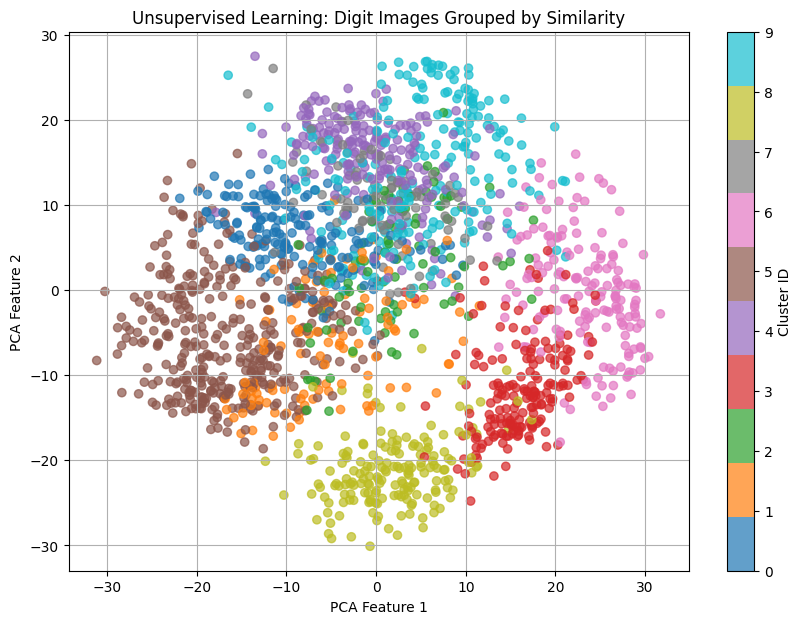

In [ ]:
# Each dot is one image.
# The color shows which group (cluster) it was placed into.
# The dots that are close together look similar, according to the robot.

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='tab10', alpha=0.7)
plt.title("Unsupervised Learning: Digit Images Grouped by Similarity")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
# plt.zlabel("PCA Feature 3")
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()

# Reinforcement Learning

### Q-learning is a model-free reinforcement learning algorithm used to learn the optimal action-selection policy for an agent interacting with an environment. It enables the agent to learn from experience by updating a table of values (called the Q-table) that estimate the quality (Q-value) of taking a certain action in a particular state.

## Imports

In [ ]:
# numpy: For numerical operations (creating and updating Q-table).
import numpy as np

# random: For random decisions during exploration.
import random

## Environment Setup

In [ ]:
grid_size = 4
goal = (3, 3)
actions = ['up', 'down', 'left', 'right']
q_table = np.zeros((grid_size, grid_size, len(actions)))

# grid_size: Defines a 4x4 grid.
# goal: The target position to reach (bottom-right).
# actions: Possible directions the agent can move.
# q_table: A 3D array to store Q-values for each (state, action) pair.
# Shape: (4, 4, 4) — one Q-value per action for each cell in the grid.

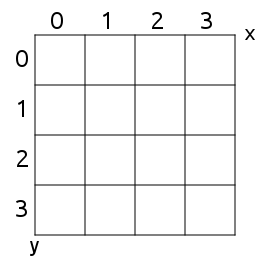

## Environment Functions

In [ ]:
def reset():
    return (0, 0)  # always start at top-left

def move(state, action):
    x, y = state
    if action == 'up':
        x = max(0, x - 1)
    elif action == 'down':
        x = min(grid_size - 1, x + 1)
    elif action == 'left':
        y = max(0, y - 1)
    elif action == 'right':
        y = min(grid_size - 1, y + 1)

    reward = 1 if (x, y) == goal else -0.01
    done = (x, y) == goal
    return (x, y), reward, done

# Initializes the agent at the start of each episode at (0, 0).
# Moves the agent in the specified direction while ensuring it stays within grid boundaries.
# Returns:
#     new_state: New position after the move.
#     reward: 1 if goal is reached, else small penalty -0.01.
#     done: True if goal is reached.


## Q-Learning Hyperparameters

In [ ]:
alpha = 0.1       # learning rate
gamma = 0.9       # discount factor
epsilon = 0.2     # exploration rate
episodes = 200    # training loops

# alpha: Controls how much new information overrides old Q-values.
# gamma: Importance of future rewards.
# epsilon: Probability of taking a random action (exploration).
# episodes: Number of times the agent is trained.

## Q-Learning Training Loop

In [ ]:
for _ in range(episodes):
    state = reset()
    done = False

    while not done:
        x, y = state

        if random.random() < epsilon:
            action_index = random.randint(0, 3)
        else:
            action_index = np.argmax(q_table[x, y])

        action = actions[action_index]
        next_state, reward, done = move(state, action)
        nx, ny = next_state

        old_value = q_table[x, y, action_index]
        next_max = np.max(q_table[nx, ny])
        q_table[x, y, action_index] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state

# For each episode, it resets to start and keeps moving until the goal is reached.
# Decides whether to explore or exploit based on epsilon.
# Uses the Q-learning formula to update the Q-table.


## Extract Learned Path

In [ ]:
state = reset()
path = [state]
done = False

while not done:
    x, y = state
    action_index = np.argmax(q_table[x, y])
    action = actions[action_index]
    state, _, done = move(state, action)
    path.append(state)

print("Learned Path:", path)


# Uses the learned Q-table (greedy policy) to move from start to goal.
# Stores each state visited into path.
# Prints the final learned path.

Learned Path: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3)]


## Visualize Path on Grid

In [ ]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

def draw_grid(path):
    grid = np.full((grid_size, grid_size), ' ')
    for i, (x, y) in enumerate(path):
        grid[x, y] = str(i) if (x, y) != goal else 'G'
    grid[0, 0] = 'S'  # Mark start
    print("Grid (S = Start, G = Goal, numbers = steps):")
    for row in grid:
        print(' '.join(row))

# Test the learned path
state = reset()
path = [state]
done = False

while not done:
    clear_output(wait=True)
    x, y = state
    action_index = np.argmax(q_table[x, y])
    action = actions[action_index]
    print(f"Robot at: {state}, Action: {action}")
    state, _, done = move(state, action)
    path.append(state)
    draw_grid(path)
    time.sleep(1)

# For animated display of the robot moving through the grid.
# Creates a 2D array of the grid.
# Marks:
#     'S' for Start.
#     'G' for Goal.
#     Numbers for each step the agent takes.
# Step-by-step shows the robot's decisions based on the learned Q-values.
# Waits 0.8s between each step for animation.


Robot at: (2, 3), Action: down
Grid (S = Start, G = Goal, numbers = steps):
S      
1 2 3 4
      5
      G
